
# 🖼️ Exploración de Espacios de Color: RGB, HSI y CMYK

Este notebook está diseñado para que explorar de manera práctica los principales espacios de color que se utilizan en procesamiento de imágenes.

## 🎯 Objetivos de Aprendizaje
- Comprender los espacios de color RGB, HSI (HSV como aproximación) y CMYK.
- Manipular canales de color y visualizar sus efectos en la imagen.
- Aplicar máscaras de color para segmentar regiones específicas.
- Desarrollar intuición sobre el uso de cada espacio de color en visión computacional.


In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [161]:
# Función auxiliar para mostrar imágenes fácilmente
def mostrar(img, titulo="Imagen"):
  plt.imshow(img)
  plt.title(titulo)
  plt.axis("off")
  plt.show()

## 1️⃣ Cargar y Mostrar Imagen

In [162]:
! curl -L "https://i.ytimg.com/vi/sqWvygL54p8/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCJkb2mRVpVlkKfG08OHHWcL5wDpA" -o iuno.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 53490  100 53490    0     0   292k      0 --:--:-- --:--:-- --:--:--  295k


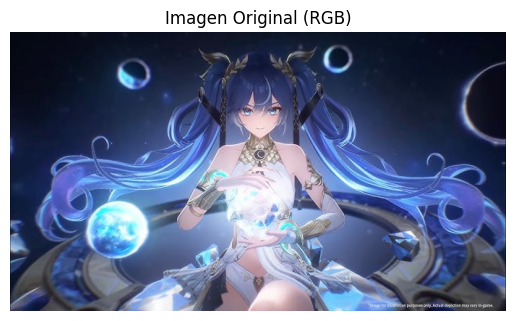

In [163]:
imagen = cv2.imread('iuno.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

mostrar(imagen_rgb, "Imagen Original (RGB)")

## 2️⃣ Separación de Canales RGB

In [164]:
R, G, B = cv2.split(imagen_rgb)

In [165]:
R.shape

(386, 686)

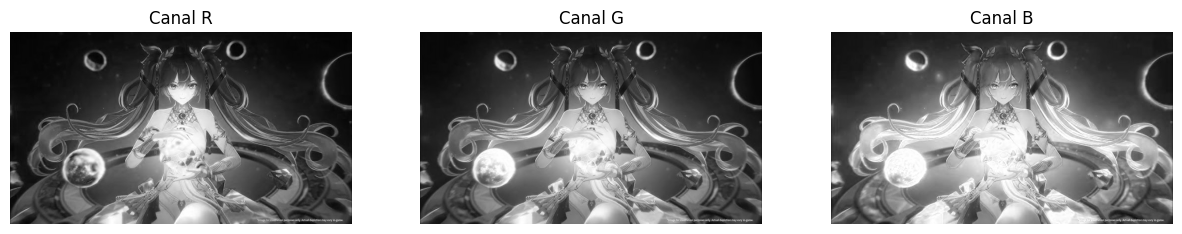

In [166]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(R, cmap='gray'); axs[0].set_title("Canal R")
axs[1].imshow(G, cmap='gray'); axs[1].set_title("Canal G")
axs[2].imshow(B, cmap='gray'); axs[2].set_title("Canal B")
for ax in axs: ax.axis("off")
plt.show()


## 3️⃣ Conversión a HSI (HSV como aproximación)

In [167]:
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)
H, S, I = cv2.split(imagen_hsv)

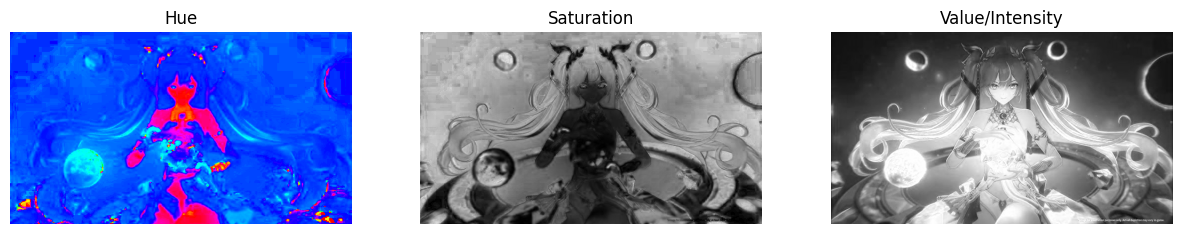

In [168]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(H, cmap='hsv'); axs[0].set_title("Hue")
axs[1].imshow(S, cmap='gray'); axs[1].set_title("Saturation")
axs[2].imshow(I, cmap='gray'); axs[2].set_title("Value/Intensity")
for ax in axs: ax.axis("off")
plt.show()

## 4️⃣ Conversión a CMYK

In [169]:
imagen_norm = imagen_rgb / 255.0
K = 1 - np.max(imagen_norm, axis=2)
C = (1 - imagen_norm[...,0] - K) / (1 - K + 1e-8)
M = (1 - imagen_norm[...,1] - K) / (1 - K + 1e-8)
Y = (1 - imagen_norm[...,2] - K) / (1 - K + 1e-8)

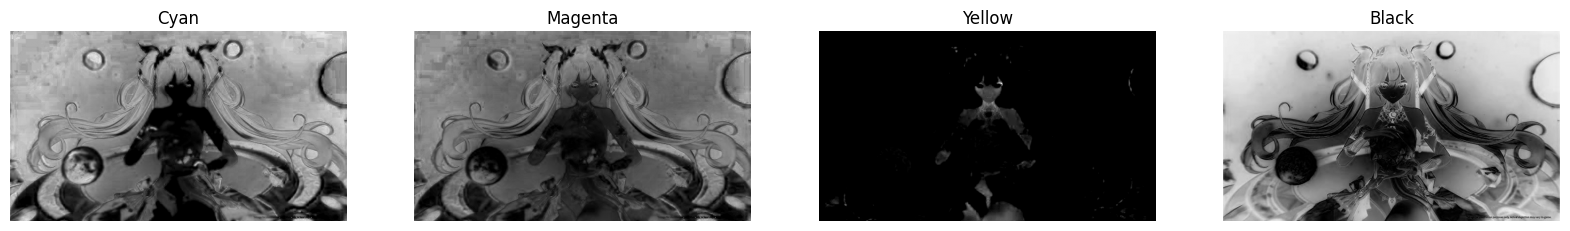

In [170]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))
axs[0].imshow(C, cmap='gray'); axs[0].set_title("Cyan")
axs[1].imshow(M, cmap='gray'); axs[1].set_title("Magenta")
axs[2].imshow(Y, cmap='gray'); axs[2].set_title("Yellow")
axs[3].imshow(K, cmap='gray'); axs[3].set_title("Black")
for ax in axs: ax.axis("off")
plt.show()


## 🧪 Actividades

1. **Manipulación en RGB:**  
   - Incrementar el canal rojo en un 30% y el azul en un 50%, saturando en 255 si es necesario. Luego mostrar la imagen resultante.

2. **Detección de Colores en HSI:**  
   - Usando el canal **Hue**, crear una máscara que aísle solo los tonos de verde. Luego, generar una imagen donde solo el verde se mantenga en color y el resto en escala de grises.

3. **Filtrado Basado en Saturación:**  
   - Eliminar toda la saturación para convertir. ¿A qué escala llega? ¿Por qué?
   - Luego, aumentar la saturación en un 40% y observa el resultado.

4. **Experimentos con CMYK:**  
   - Sustituye el canal C (Cyan) por el canal M (Magenta) y visualiza el efecto en RGB reconstruido.


## 1. Manipulación en RGB

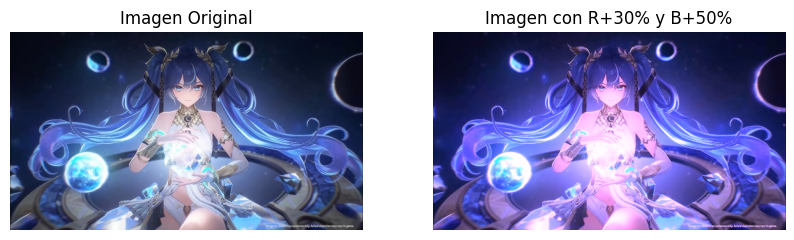

In [171]:
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#  incrementar el canal rojo en un 30% y el azul en un 50%
imagen_modificada = imagen.copy()
# canal rojo (índice 0 en RGB)
imagen_modificada[:,:,0] = np.clip(imagen_modificada[:,:,0] * 1.3, 0, 255).astype(np.uint8)
# canal azul (índice 2 en RGB)
imagen_modificada[:,:,2] = np.clip(imagen_modificada[:,:,2] * 1.5, 0, 255).astype(np.uint8)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(imagen)
axs[0].set_title("Imagen Original")
axs[1].imshow(imagen_modificada)
axs[1].set_title("Imagen con R+30% y B+50%")
for ax in axs: ax.axis("off")
plt.show()

## 2. Detección de Colores en HSI

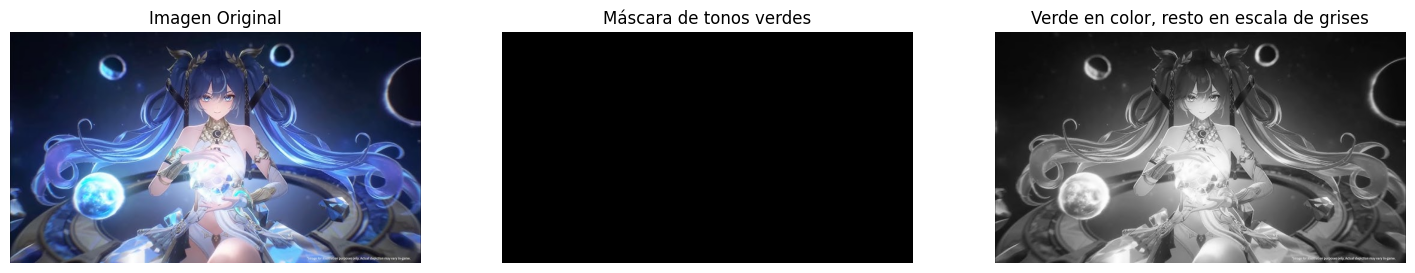

In [172]:
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)

# rangos de color verde en HSV
verde_bajo = np.array([35, 50, 50])
verde_alto = np.array([85, 255, 255])

# máscara para los tonos verdes
mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
imagen_gris = cv2.cvtColor(imagen_gris, cv2.COLOR_GRAY2RGB)

# aplicar la máscara: verde en color, resto en escala de grises
resultado = imagen_gris.copy()
resultado[mascara_verde > 0] = imagen[mascara_verde > 0]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].imshow(imagen)
axs[0].set_title("Imagen Original")
axs[1].imshow(mascara_verde, cmap='gray')
axs[1].set_title("Máscara de tonos verdes")
axs[2].imshow(resultado)
axs[2].set_title("Verde en color, resto en escala de grises")
for ax in axs: ax.axis("off")
plt.show()

## 3. Filtrado Basado en Saturación

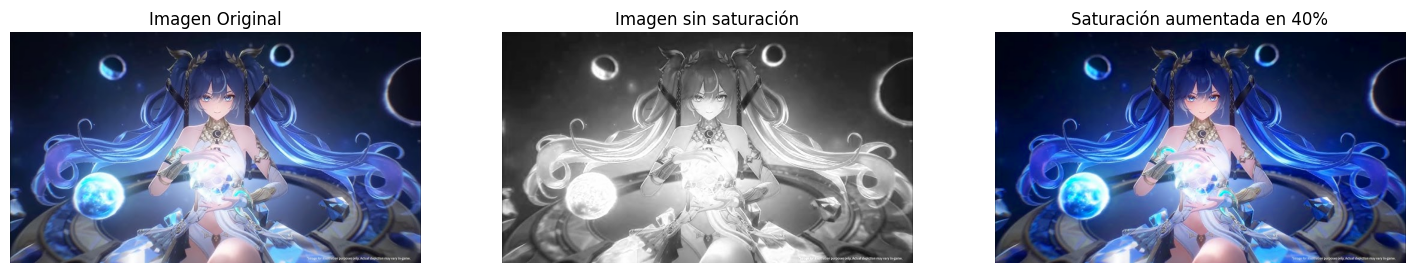

In [173]:
# elminar la saturaacion
imagen_sin_saturacion = imagen_hsv.copy()
imagen_sin_saturacion[:,:,1] = 0  # canal S es el índice 1 en HSV

# aumentar la saturación en un 40%
imagen_mas_saturacion = imagen_hsv.copy()
imagen_mas_saturacion[:,:,1] = np.clip(imagen_mas_saturacion[:,:,1] * 1.4, 0, 255).astype(np.uint8)

imagen_sin_saturacion_rgb = cv2.cvtColor(imagen_sin_saturacion, cv2.COLOR_HSV2RGB)
imagen_mas_saturacion_rgb = cv2.cvtColor(imagen_mas_saturacion, cv2.COLOR_HSV2RGB)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].imshow(imagen)
axs[0].set_title("Imagen Original")
axs[1].imshow(imagen_sin_saturacion_rgb)
axs[1].set_title("Imagen sin saturación")
axs[2].imshow(imagen_mas_saturacion_rgb)
axs[2].set_title("Saturación aumentada en 40%")
for ax in axs: ax.axis("off")
plt.show()

## 4. Experimentos con CMYK

In [174]:
def cmyk_to_rgb(cmyk):
    # normalizar CMYK a [0,1]
    cmyk_norm = cmyk.astype(float) / 255.0
    
    # extraer canales
    c, m, y, k = cv2.split(cmyk_norm)
    
    r = (1 - c) * (1 - k)
    g = (1 - m) * (1 - k)
    b = (1 - y) * (1 - k)
    
    r = (r * 255).astype(np.uint8)
    g = (g * 255).astype(np.uint8)
    b = (b * 255).astype(np.uint8)
    
    return cv2.merge([r, g, b])

# convertir la imagen a CMYK
imagen_cmyk = rgb_to_cmyk(imagen)

# extraer canales
C, M, Y, K = cv2.split(imagen_cmyk)

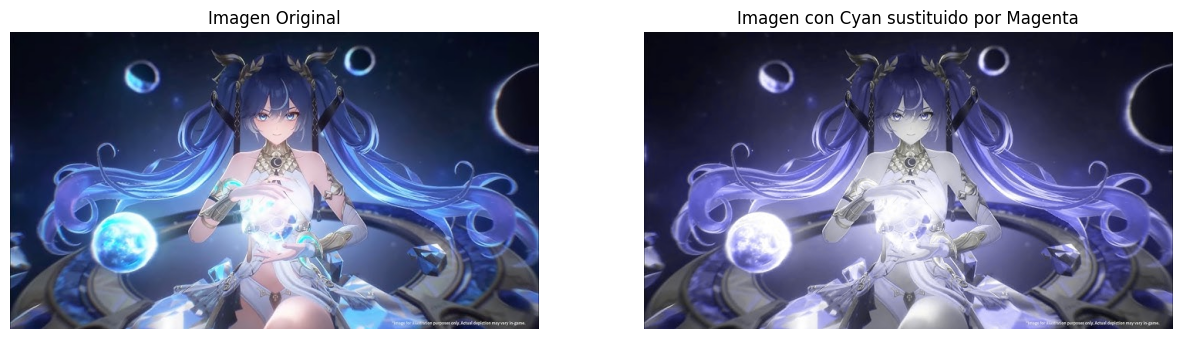

In [175]:
# sustituir el canal C (Cyan) por el canal M (Magenta)
imagen_cmyk_modificada = cv2.merge([M, M, Y, K])  # M en lugar de C

# convertir de vuelta a RGB
imagen_rgb_modificada = cmyk_to_rgb(imagen_cmyk_modificada)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(imagen)
axs[0].set_title("Imagen Original")
axs[1].imshow(imagen_rgb_modificada)
axs[1].set_title("Imagen con Cyan sustituido por Magenta")
for ax in axs: ax.axis("off")
plt.show()